## Titanic DataSet

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [9]:
train.shape

(891, 12)

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

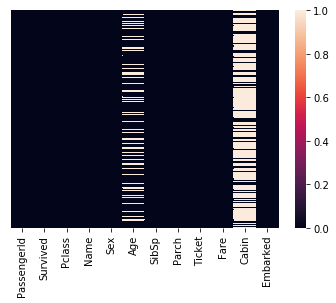

In [22]:
sns.heatmap(train.isnull(), yticklabels=False)

In [30]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


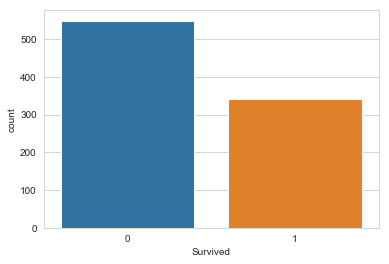

In [36]:
print(train.columns)
sns.countplot(x='Survived', data=train)

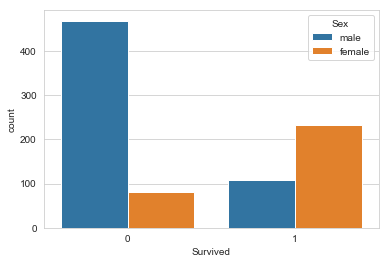

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex' )

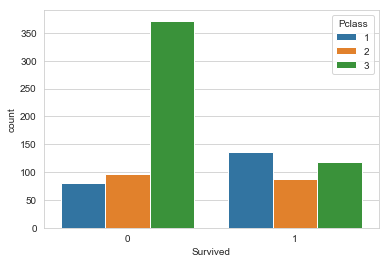

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass' )

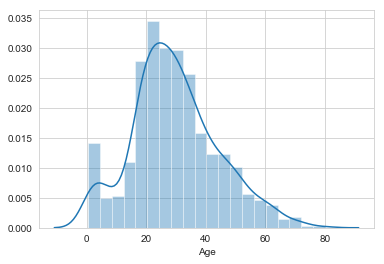

In [46]:
sns.distplot(train['Age'].dropna(), bins=20)

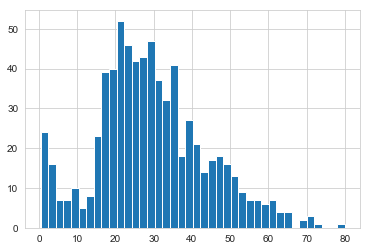

In [48]:
train['Age'].hist(bins=40)

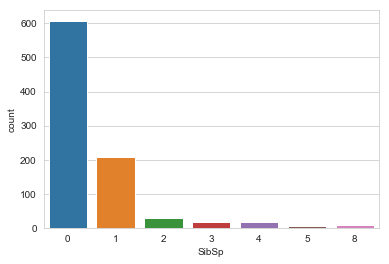

In [52]:
sns.countplot(x='SibSp', data=train)

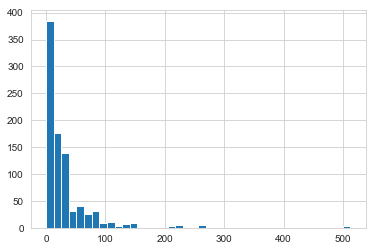

In [54]:
train['Fare'].hist(bins=40)

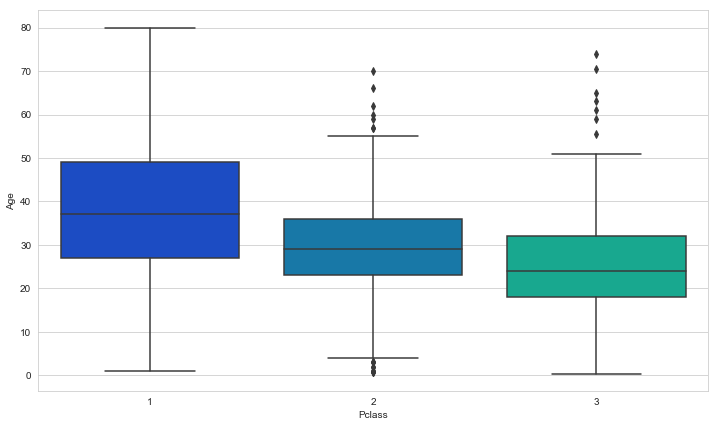

In [60]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [63]:
train.Age.isnull().sum()

177

In [67]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    return Age

In [68]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

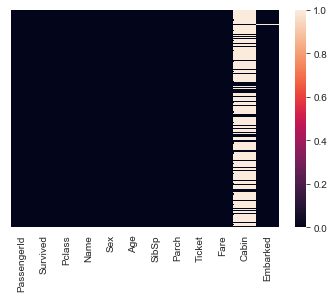

In [70]:
sns.heatmap(train.isnull(), yticklabels=False)

In [73]:
train.drop('Cabin', axis=1, inplace=True)

In [74]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


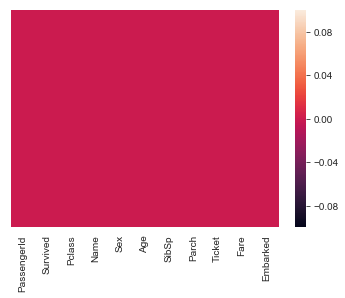

In [82]:
sns.heatmap(train.isnull(), yticklabels=False)

In [81]:
train.Embarked = train.Embarked.fillna('Q')
sns.heatmap(train.isnull(), yticklabels=False)

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [85]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [94]:
train.drop(['Sex', 'Embarked','Name', 'Ticket'], axis=1, inplace=True)

In [95]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [96]:
df = pd.concat([train, sex, embark], axis=1)

In [97]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [100]:
X = df.drop("Survived", axis=1)
y = df.Survived

In [99]:
from sklearn.model_selection import train_test_split as tts


In [101]:
x_train, x_test, y_train, y_test = tts(X, y, test_size = 0.3,
                                      random_state= 42)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression()

In [107]:
logmodel.fit(x_train, y_train)

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
preds = logmodel.predict(x_test)

In [110]:
from sklearn.metrics import confusion_matrix

In [113]:
accuracy = confusion_matrix(y_test,preds)

In [114]:
accuracy

array([[136,  21],
       [ 32,  79]], dtype=int64)

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test, preds)

0.8022388059701493